## <font size=5> <strong>Heart Disease Prediction By Budh Ram And Bhargavi Chetule

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## I. Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


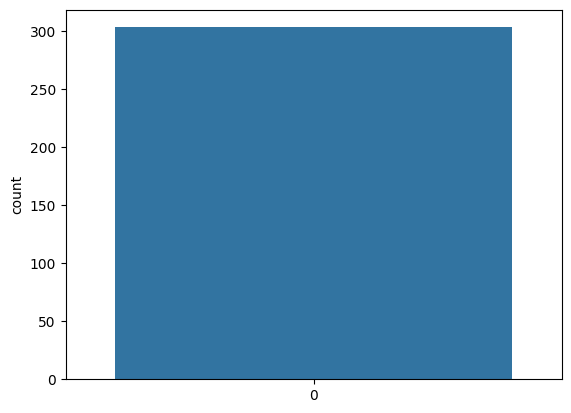

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

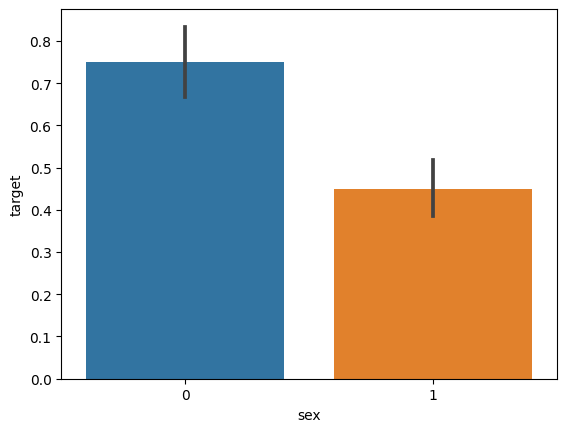

In [ ]:
sns.barplot(x = dataset["sex"], y=y, data = dataset)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

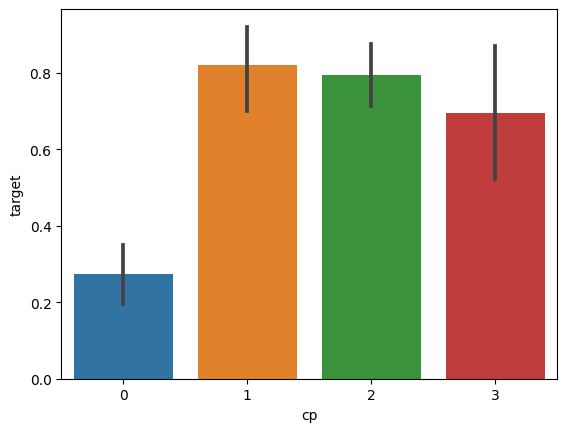

In [ ]:
sns.barplot(x = dataset["cp"], y=y, data = dataset)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

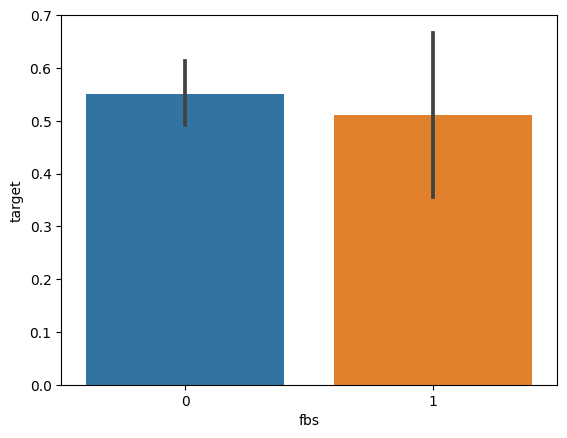

In [ ]:
sns.barplot(x = dataset["fbs"], y=y, data = dataset)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

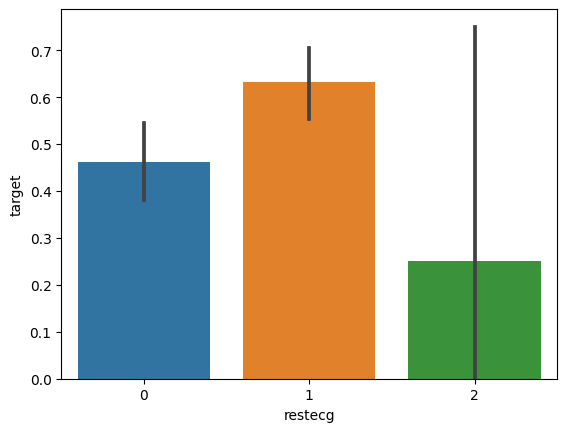

In [ ]:
sns.barplot(x = dataset["restecg"], y=y, data = dataset)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

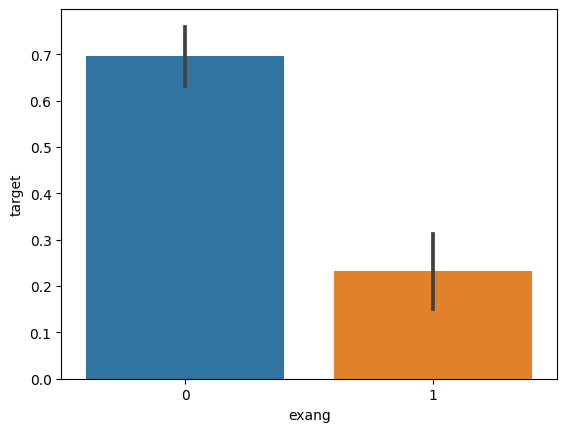

In [ ]:
sns.barplot(x = dataset["exang"], y=y, data = dataset)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

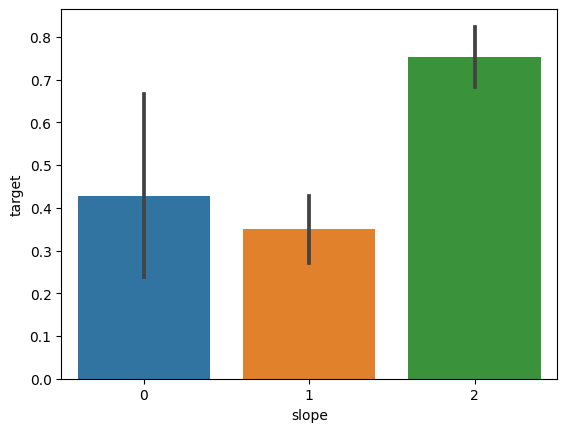

In [ ]:
sns.barplot(x = dataset["slope"], y=y, data = dataset)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

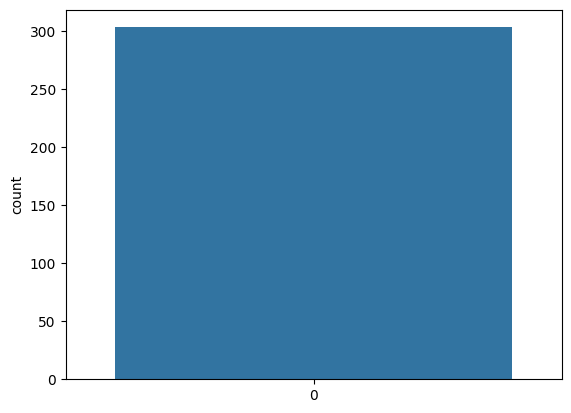

In [ ]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

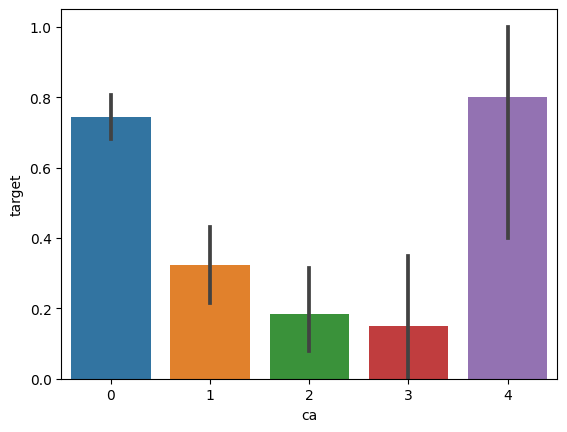

In [ ]:
sns.barplot(x = dataset["ca"], y=y, data = dataset)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

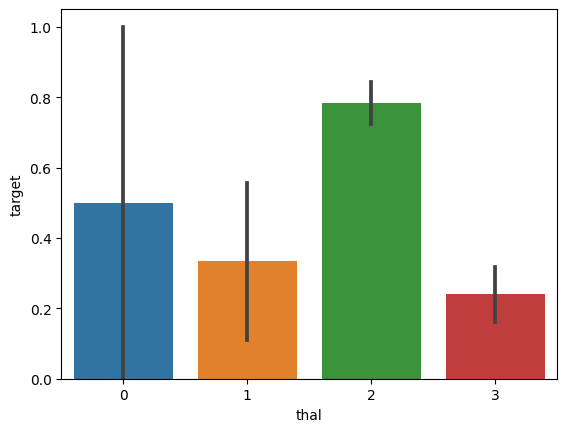

In [ ]:
sns.barplot(x = dataset["thal"], y=y, data = dataset)

<Axes: xlabel='thal', ylabel='Density'>

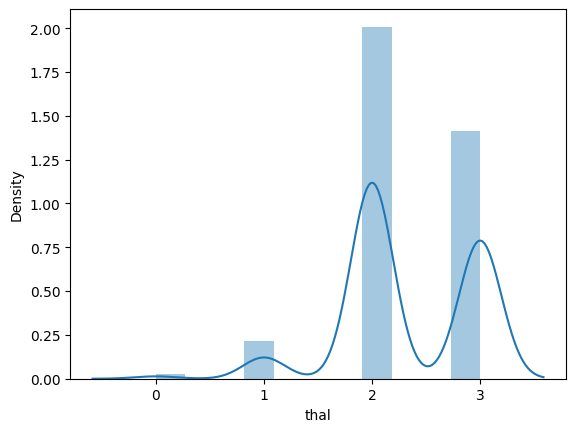

In [ ]:
sns.distplot(dataset["thal"])

## 1. Research Paper on logistic regression with MAD and LQD Method

In [ ]:
from sklearn.linear_model import LogisticRegression
from statsmodels.api import RLM
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load data
data_path = "/content/drive/MyDrive/Machine Learning Project/heart.csv"
heart_df = pd.read_csv(data_path)

# Step 2: Data exploration and preprocessing
# Check for missing values
print(heart_df.isnull().sum())

# Check for correlation between variables
print(heart_df.corr())

# Split the data into independent and dependent variables
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Binary logistic regression analysis and robust method analysis
# Perform spearman's correlation to check for multicollinearity
correlation_matrix = X_train.corr(method='spearman')
print(correlation_matrix)

# Step 3: Train logistic regression model
logreg_model = LogisticRegression().fit(X_train, y_train)

# Step 4: Train LQD and MAD models
lqd_model = RLM(y_train, X_train).fit()
mad = np.median(abs(X_train - np.median(X_train, axis=0)), axis=0)
mad_model = RLM(y_train, X_train, scale=mad).fit()

# Step 5: Compare model accuracies
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))
lqd_accuracy = accuracy_score(y_test, np.round(lqd_model.predict(X_test)))
mad_fitted = mad_model.predict(X_test)
mad_accuracy = accuracy_score(y_test, np.round(mad_fitted))


print("Logistic Regression Accuracy: ", logreg_accuracy)
print(classification_report(y_test, logreg_model.predict(X_test)))
print("LQD Model Accuracy: ", lqd_accuracy)
print(classification_report(y_test, np.round(lqd_model.predict(X_test))))
print("MAD Model Accuracy: ", mad_accuracy)
print(classification_report(y_test,np.round(mad_fitted)))

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['scale']
  warnings.warn(msg, ValueWarning)


## 2. Research Paper on Naive Bayes with PSO

In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pyswarms as ps

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Define the fitness function
def fitness_function(params, X_train, y_train, X_test, y_test):
    alpha, var_smoothing = params[0]

    # Create a Gaussian Naive Bayes model with the given hyperparameters
    gnb = GaussianNB(var_smoothing=var_smoothing)

    # Train the model on the training data
    gnb.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = gnb.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Invert the accuracy score (PSO tries to minimize the fitness function)
    return 1 - accuracy

# Define the search space
dim = 2
n_particles = 10
bounds = (np.array([0.0, 0.0]), np.array([1.0, 1e-8]))

# Define the options for the optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2, 'maxiter': 100}

# Define the PSO optimizer and run the optimization
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dim, options=options, bounds=bounds)
cost, pos = optimizer.optimize(fitness_function, iters=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Extract the best hyperparameters
best_alpha, best_var_smoothing = pos

# Create a new model with the best hyperparameters
best_gnb = GaussianNB(var_smoothing=best_var_smoothing)

# Train the model on the full dataset
best_gnb.fit(data.drop('target', axis=1), data['target'])

# Make predictions on the same dataset
y_pred = best_gnb.predict(data.drop('target', axis=1))

# Calculate the accuracy score
accuracy = accuracy_score(data['target'], y_pred)

print('Best hyperparameters:', {'alpha': best_alpha, 'var_smoothing': best_var_smoothing})
print('Accuracy:', accuracy)
print(classification_report(data['target'], y_pred))

2023-04-06 12:13:07,112 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2, 'maxiter': 100}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.131
2023-04-06 12:13:07,845 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1311475409836066, best pos: [7.07480195e-01 9.75067049e-09]


Best hyperparameters: {'alpha': 0.7074801948839962, 'var_smoothing': 9.750670485220383e-09}
Accuracy: 0.8415841584158416
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       138
           1       0.84      0.88      0.86       165

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



## 3. Research Paper using KNN + SMOTE




In [ ]:
# Load the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')
X = df.iloc[:, 0:13].values
y = df['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Apply the SMOTE algorithm to balance the training set
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Standardize the training and testing sets
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the SMOTE-balanced training set
knn.fit(X_train_smote, y_train_smote)

# Predict the target variable for the testing set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy and classification report
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy score: 0.8157894736842105
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



## 4. Research Paper using Random Forest




In [ ]:
# Importing the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')

# Splitting the dataset into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the random forest model
rfc = RandomForestClassifier(n_estimators=500, random_state=42)

# Fitting the model to the training data
rfc.fit(X_train, y_train)

# Predicting on the testing data
y_pred = rfc.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



##  Our Study on Different Algorithm

##1. logistic regression

In [ ]:
# Step 1: Load data
import pandas as pd

data_path = "/content/drive/MyDrive/Machine Learning Project/heart.csv"
heart_df = pd.read_csv(data_path)

# Step 2: Data exploration and preprocessing
# Check for missing values
print(heart_df.isnull().sum())

# Check for correlation between variables
print(heart_df.corr())

# Split the data into independent and dependent variables
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 3: Train logistic regression model with randomized search for hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameter search space
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'],
    'max_iter': [100, 500, 1000, 5000]
}

# Define logistic regression estimator
estimator = LogisticRegression()

# Define randomized search cross-validation
random_search = RandomizedSearchCV(
    estimator,
    hyperparameters,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit randomized search cross-validation to training data
random_search.fit(X_train, y_train)

# Step 4: Evaluate model on test data
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy score
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Print best hyperparameters and accuracy score
print("Best hyperparameters: ", random_search.best_params_)
print("Accuracy score: ", accuracy)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   

## 2. Naive Bayes With Laplance smoothing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Read in the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')

# Split into features and target
X = df.drop(['target'], axis=1)
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Naive Bayes model with Laplace smoothing
class NaiveBayes:

    def fit(self, X, y, alpha=1):
        self.X, self.y, self.alpha = X, y, alpha
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance for each feature for each class
        for i, c in enumerate(self.classes):
            X_class = X[y == c]
            mean = X_class.mean(axis=0)
            var = X_class.var(axis=0)
            parameters = {"mean": mean, "var": var}
            self.parameters.append(parameters)

    def predict(self, X):
        n_samples, n_features = X.shape
        # Calculate the log probabilities for each class
        log_probs = np.zeros((n_samples, len(self.classes)))
        for i, c in enumerate(self.classes):
            mean = self.parameters[i]["mean"]
            var = self.parameters[i]["var"]
            log_probs[:,i] = np.sum(-0.5 * np.log(2 * np.pi * var)
                                    - 0.5 * ((X - mean) ** 2 / var), axis=1)
            log_probs[:,i] += np.log(len(self.X[self.y == c]) + self.alpha) - np.log(len(self.X) + self.alpha * len(self.classes))
        # Return the class with the highest log probability
        return self.classes[np.argmax(log_probs, axis=1)]

# Create an instance of the NaiveBayes class and fit the model
nb = NaiveBayes()
nb.fit(X_train, y_train, alpha=1)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 3.KNN

Minimum error:- 0.13157894736842105 at K = 7
0.868421052631579
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



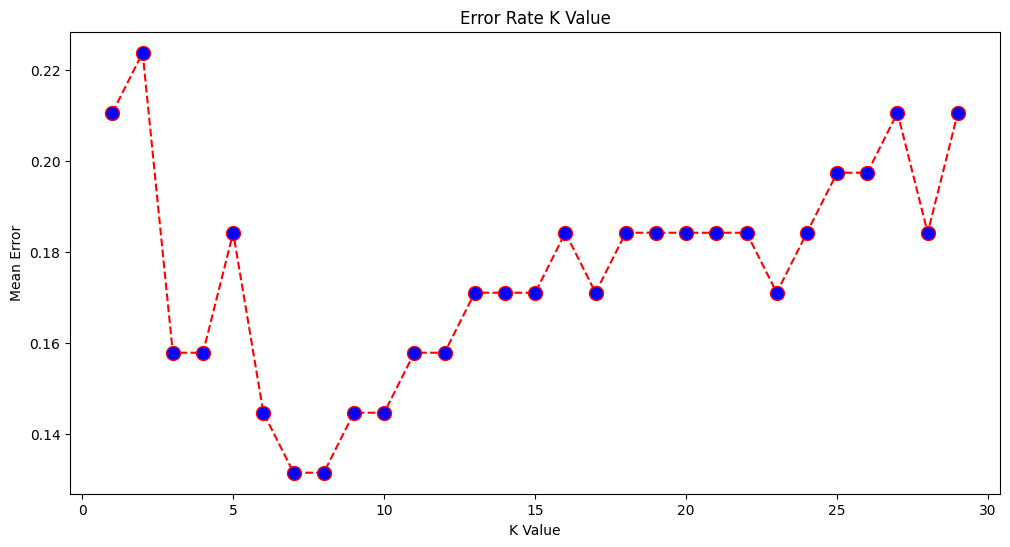

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')
x= df.iloc[:,0:13].values 
y= df['target'].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)


error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)


classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

## 4.Random Forest

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trestbps,58.629045
7,thalach,47.459548
0,age,39.241186
4,chol,26.276396
12,thal,17.664200
10,slope,10.222614
13,target,4.428356
1,sex,3.682952
9,oldpeak,3.120906
2,cp,2.615083


In [ ]:
# drop column 'trtbps' (vif > 11)
df.drop(columns = ['trestbps'], inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalach,38.300553
0,age,28.744008
3,chol,25.936770
11,thal,17.524141
9,slope,10.214878
12,target,4.422940
1,sex,3.682730
8,oldpeak,3.036520
2,cp,2.600842
5,restecg,2.081027


In [ ]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalach'], inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
0,age,27.777961
3,chol,22.645027
10,thal,16.076863
8,slope,9.008008
11,target,3.929375
1,sex,3.483817
7,oldpeak,3.008700
2,cp,2.559682
5,restecg,2.064550
6,exang,2.019289


In [ ]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
2,chol,15.735062
9,thal,14.894501
7,slope,8.753853
10,target,3.849542
0,sex,3.467321
6,oldpeak,2.850497
1,cp,2.536967
4,restecg,2.055214
5,exang,2.003339
8,ca,1.861444


In [ ]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
8,thal,10.567612
6,slope,7.545101
9,target,3.649426
0,sex,3.437133
5,oldpeak,2.631131
1,cp,2.526467
3,restecg,2.049195
4,exang,1.951366
7,ca,1.840908
2,fbs,1.226580


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
max_accuracy = 0

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.20, random_state=0)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")
print(classification_report(Y_test, Y_pred_rf))

The accuracy score achieved using Random forest is: 91.8 %
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
# logistic regression-   0.85-------->0.89
# Naive Bayes-           0.84-------->0.87
# KNN-                   0.82-------->0.87
# Random Forest-         0.836------->0.92